In [116]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

## Sample Simulation

(400, 2) (400,)


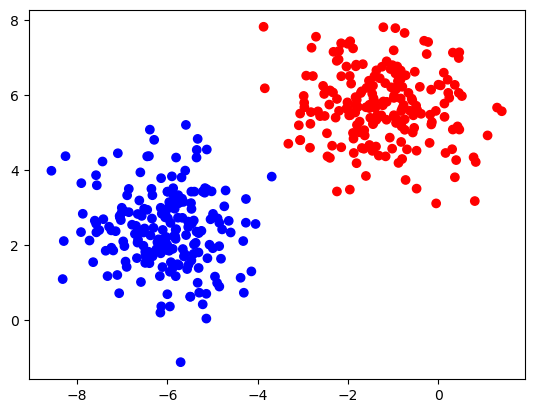

In [117]:
x, y = make_blobs(n_samples=400, n_features=2, centers=2, random_state=1234)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')
plt.show()

### Function to visualize Perceptron behaviour

In [118]:
def plot_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

    y_mesh = np.dot(x_mesh, np.array(w).reshape(1, -1).T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

## Using Vanilla Python

In [119]:
# Defining basic parameters
D = x.shape[1]
w = [2*random() - 1 for i in range(D)]
b = 2*random() - 1
learning_rate = 1e-2

for step in range(101):
    for x_n, y_n in zip(x,y):

        agg_func = sum([x_i*w_i for x_i,w_i in zip(x_n, w)]) + b
        y_pred = 1 if agg_func > 0 else 0
        error = y_n - y_pred
        w = [w_i + learning_rate*error*x_i for x_i, w_i in zip(x_n, w)]
        b = b + learning_rate*error

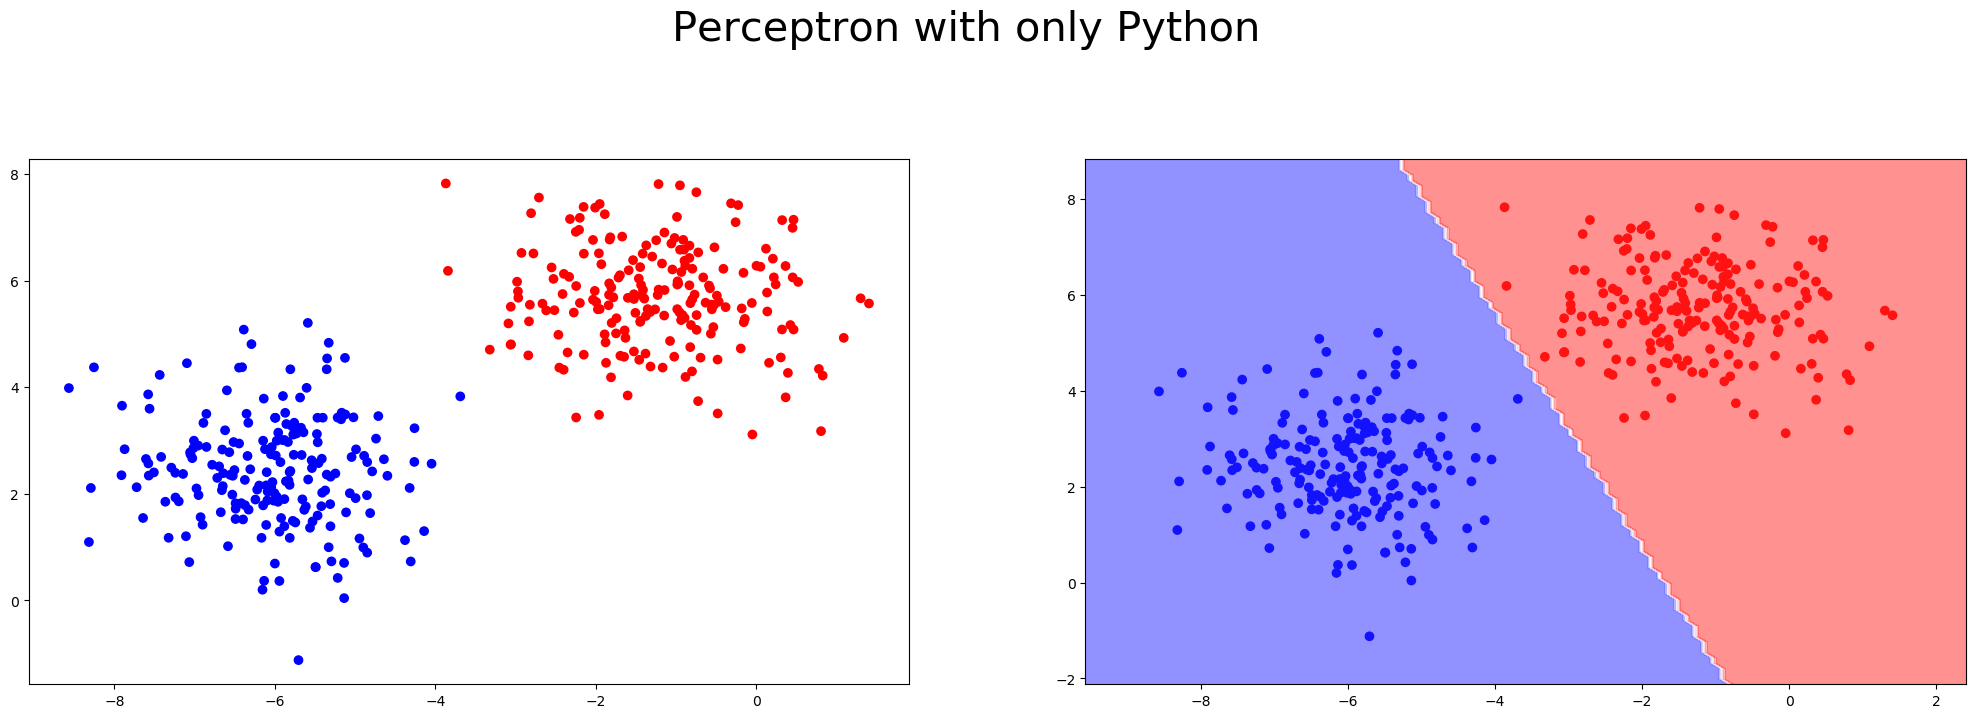

In [120]:
fig = plt.figure(figsize=(25, 15))
fig.suptitle("Perceptron with only Python", size=30)

plt.subplot(2, 2, 1)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

plt.subplot(2, 2, 2)
plot_classifier(x, y, w, b)

## Using Numpy

In [121]:
# Defining basic parameters
D = x.shape[1]
w = 2*np.random.random(size=D)-1
b = 2*np.random.random()-1       
learning_rate = 1e-2

for step in range(101):
    for x_n, y_n in zip(x, y):
        agg_func = np.dot(x_n, w) + b
        y_pred = np.where(agg_func > 0, 1, 0)
        error = y_n - y_pred
        w = w + learning_rate*np.dot(error, x_n)
        b = b + learning_rate*error

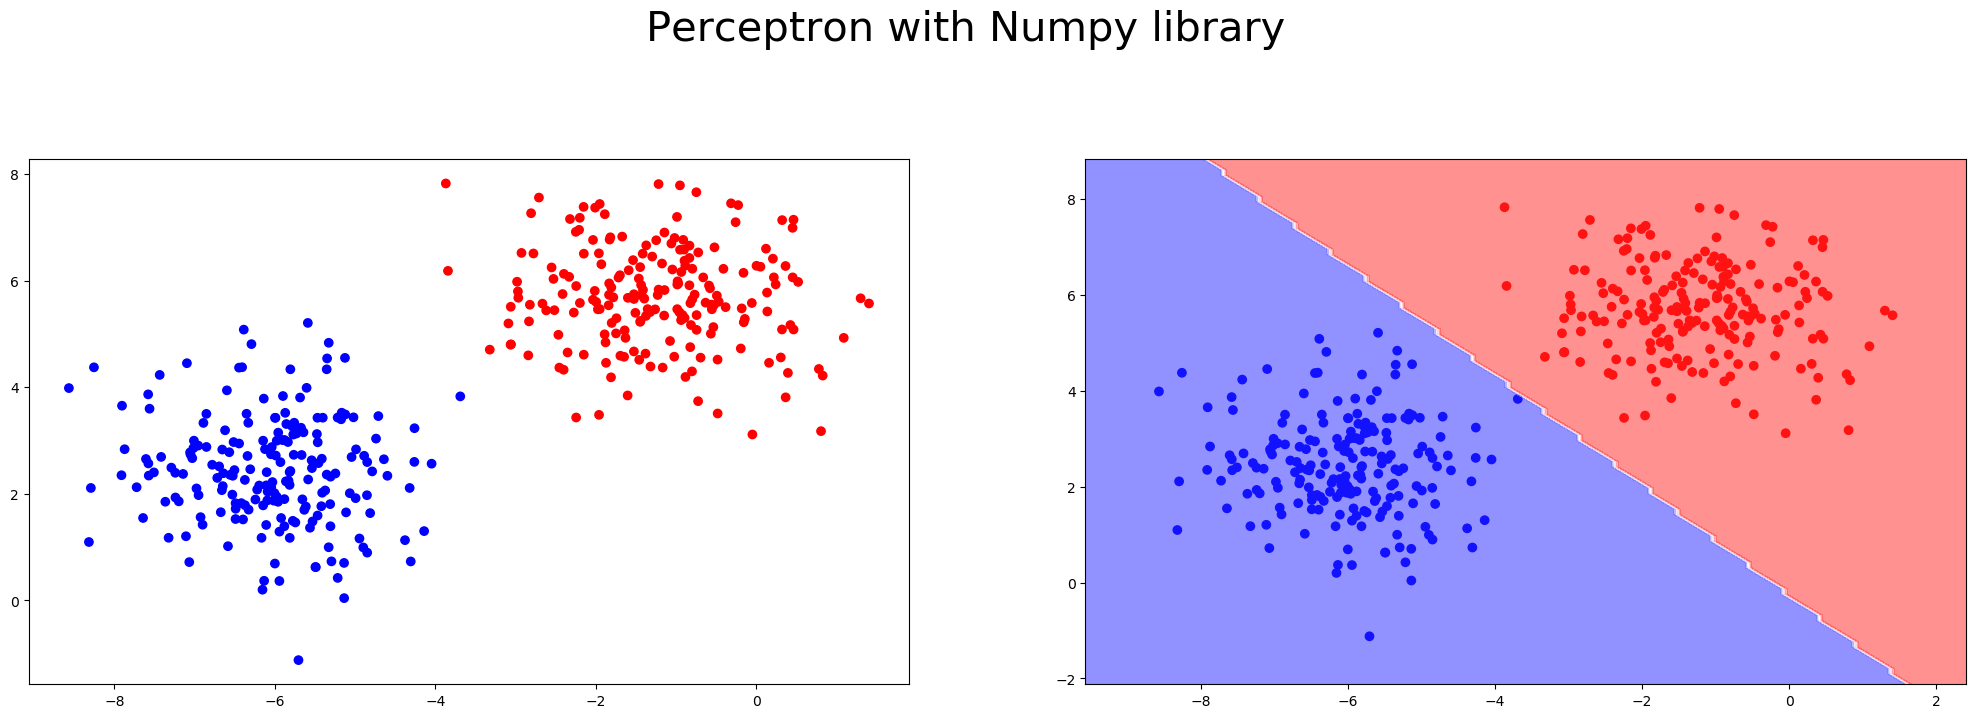

In [122]:
fig = plt.figure(figsize=(25, 15))
fig.suptitle("Perceptron with Numpy library", size=30)

plt.subplot(2, 2, 1)
plt.scatter(x[:,0], x[:,1], c=y.ravel(), cmap='bwr')

plt.subplot(2, 2, 2)
plot_classifier(x, y, w, b)